# Importation des différentes librairies

In [1]:
import os
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import statsmodels.api as sm
import scipy.stats as st

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Fonction pour analyser le code au fur et à mesure du nettoyage
def data_check(data):
    print("\n",50*"#","\n")
    print(data.info())
    print("\n",50*"#","\n")
    print("The DataFrame contains", data.shape[0], "rows and", data.shape[1], "columns")
    print("The DataFrame has",data.isna().sum().sum(),"missing values. It is completed at", 100 - round(((data.isna().sum().sum() / (data.shape[0]*data.shape[1]))) * 100, 2), "%")
    print("\n",50*"#","\n")

In [3]:
"""
# demande utilisateur de charger la base de données
file=''                                                                                      # initialize empty file   
while file.endswith('.csv') == False:
    file = input("\nwrite path to CSV file:")                                                # ask for a file
    try:
        if file.endswith('.csv') == True:
            print("\nThe File was created on", time.ctime(os.path.getmtime(file)))           # file's creation time
        else:
            print("\nThis program deals with tab (\t) separated *.csv files only")
    except FileNotFoundError:                                                                # if file doesnt exist
        print("\nThere is no file named ", file)
data = pd.read_csv(file, sep="\t",low_memory=False)    
question = input("would you like using the latest version of the file? (\"oui\"/\"non\")")   # to propose online available file                   
if question == "oui":
    internet_file = 'https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv'
    data = pd.read_csv(internet_file, sep="\t",low_memory=False) 
else : None"""

'\n# demande utilisateur de charger la base de données\nfile=\'\'                                                                                      # initialize empty file   \nwhile file.endswith(\'.csv\') == False:\n    file = input("\nwrite path to CSV file:")                                                # ask for a file\n    try:\n        if file.endswith(\'.csv\') == True:\n            print("\nThe File was created on", time.ctime(os.path.getmtime(file)))           # file\'s creation time\n        else:\n            print("\nThis program deals with tab (\t) separated *.csv files only")\n    except FileNotFoundError:                                                                # if file doesnt exist\n        print("\nThere is no file named ", file)\ndata = pd.read_csv(file, sep="\t",low_memory=False)    \nquestion = input("would you like using the latest version of the file? ("oui"/"non")")   # to propose online available file                   \nif question == "oui":\n    in

# Import du dataset et nettoyage initial

In [39]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep="\t",low_memory=False)
print("import done")
data_check(data) 

import done

 ################################################## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB
None

 ################################################## 

The DataFrame contains 320772 rows and 162 columns
The DataFrame has 39608589 missing values. It is completed at 23.78 %

 ################################################## 



In [41]:
# vue d'ensemble
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
code,320749,320749,0000000003087,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url,320749,320749,http://world-fr.openfoodfacts.org/produit/0000...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creator,320770,3535,usda-ndb-import,169868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_t,320769,189567,1489077120,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_datetime,320763,189568,2017-03-09T10:37:09Z,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
carbon-footprint_100g,268.0,NaN,NaN,NaN,341.700764,425.211439,0.0,98.75,195.75,383.2,2842.0
nutrition-score-fr_100g,221210.0,NaN,NaN,NaN,9.165535,9.055903,-15.0,1.0,10.0,16.0,40.0
nutrition-score-uk_100g,221210.0,NaN,NaN,NaN,9.058049,9.183589,-15.0,1.0,9.0,16.0,40.0
glycemic-index_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Proportion de valeurs manquantes pour chaque variable')

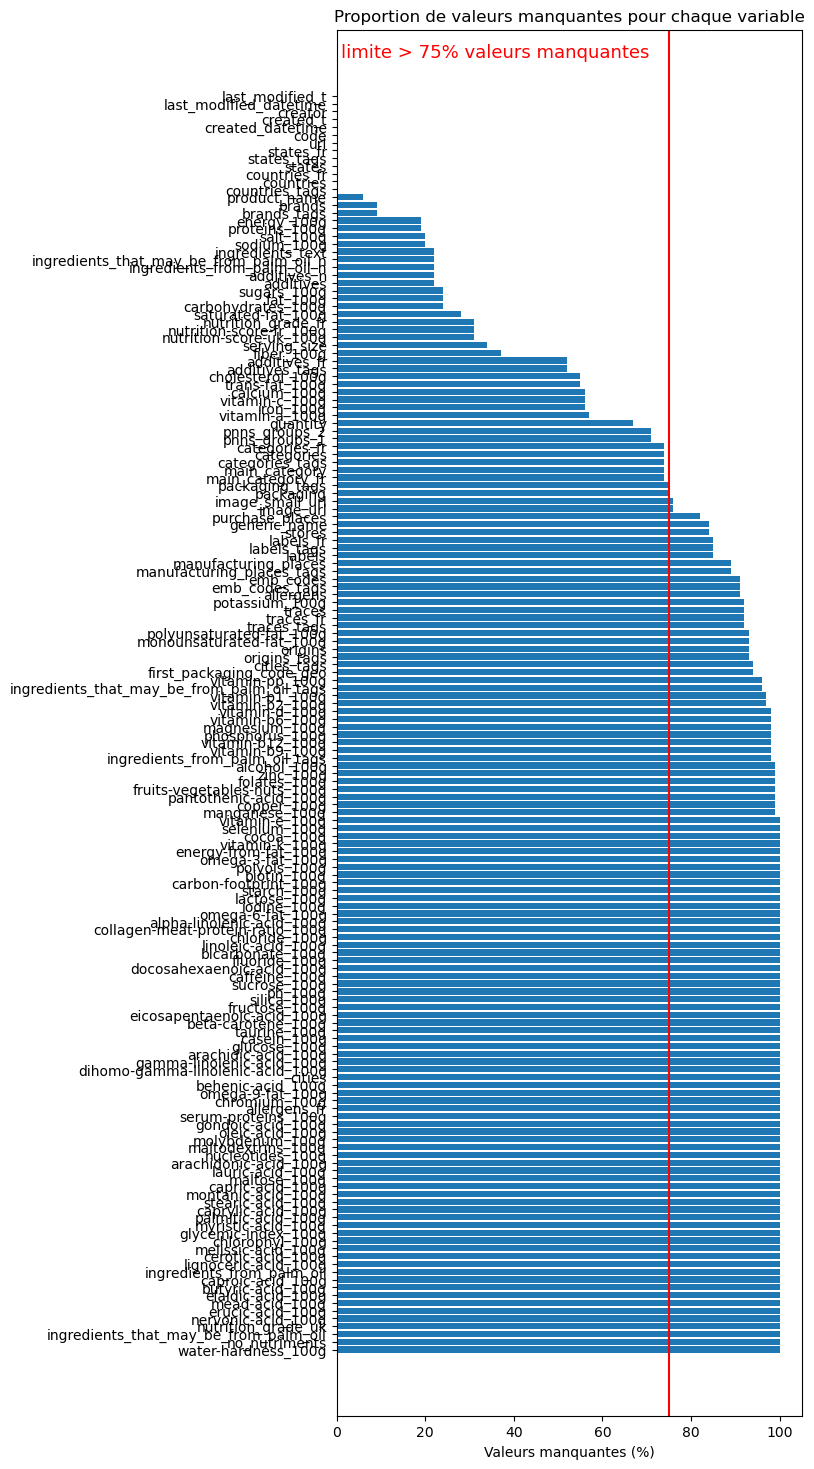

In [6]:
# representation des valeurs manquantes du dataset

to_plot = round(100*data.isnull().sum(axis=0).sort_values(ascending=False)/data.shape[0])

plt.figure(figsize=(6,18))
plt.barh(y=to_plot.index, width=to_plot.values)#,align='edge')
plt.axvline(x=75, color='r')
plt.text(1,166,'limite > 75% valeurs manquantes', size=13, c='r')
plt.xlabel("Valeurs manquantes (%)")
plt.title("Proportion de valeurs manquantes pour chaque variable")

In [7]:
# analyse remplissage données par pays / par marque
f" la proportion de valeurs rensiegnées pour polyol_100g est\
    {round(100* len(data.loc[~data['polyols_100g'].isna(),'polyols_100g'])/len(data),2)}\
        % du dataset mais on en a besoin pour calculer l'energie"

" la proportion de valeurs rensiegnées pour polyol_100g est    0.13        % du dataset mais on en a besoin pour calculer l'energie"

In [8]:
# supprime les données pour lesquelles les valeurs manquantes sont > 75%
to_del=[]
for col in data.columns:
    if (data[col].isnull().sum()/len(data) > 0.75) & ('polyols_100g' not in col): # and col not in ['energy-from-fat_100g', 'polyols_100g']:
        to_del.append(col)
data.drop(to_del,axis=1,inplace=True)

In [9]:
# Supprime les colonnes non-necessaire pour l'application
"""to_remove = ['creator', 'product_name','generic_name','quantity','url',
             'packaging','packaging_tags','brands_tags','categories','categories_tags','categories_fr',
             'origins','origins_tags','manufacturing_places','manufacturing_places_tags','labels','labels_tags','labels_fr',
             'emb_codes','emb_codes_tags','first_packaging_code_geo','cities','cities_tags','purchase_places','stores',
             'countries','countries_tags','countries_fr','ingredients_text','allergens','allergens_fr',
             'traces','traces_tags','traces_fr','serving_size','additives_n','additives','additives_tags','additives_fr',
             'ingredients_from_palm_oil_n','ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil_n',
             'ingredients_that_may_be_from_palm_oil_tags','pnns_groups_2','states','states_tags','states_fr',
             'main_category','main_category_fr','image_url','image_small_url','ph_100g']
data = data.drop(to_remove, axis=1)"""

# NE garde que les colonnes necessaire à l'Exploration 
data = data[['code','created_datetime','last_modified_datetime','created_t','last_modified_t','pnns_groups_1',\
             'nutrition_grade_fr','nutrition-score-fr_100g','energy_100g','fat_100g',\
                'carbohydrates_100g','proteins_100g', 'fiber_100g','salt_100g','sodium_100g','sugars_100g','polyols_100g']]


In [10]:
# Nettoyage des colonnes vides

empty_col = [col for col in data.columns if data[col].isnull().all()]    
data = data.drop(empty_col, axis=1).reset_index()                       

In [11]:
# Nettoyage des lignes de code de produits qui ne corresondent ni au format EAN_13 ni au format de OpenFoodFacts

index_code_na = data.loc[data['code'].isna()].index    
data = data.drop(index_code_na).reset_index(drop=True) 
index_not_EAN_13 = data.loc[(data['code'].str.len()>13)&\
                            (~(data['code'].str.startswith('200')))].index #   
data = data.drop(index_not_EAN_13).reset_index(drop=True)  

/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_34246/1894853736.py:12: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data[col] = pd.to_datetime(data[col], unit='s', errors='coerce')
/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_34246/1894853736.py:12: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data[col] = pd.to_datetime(data[col], unit='s', errors='coerce')


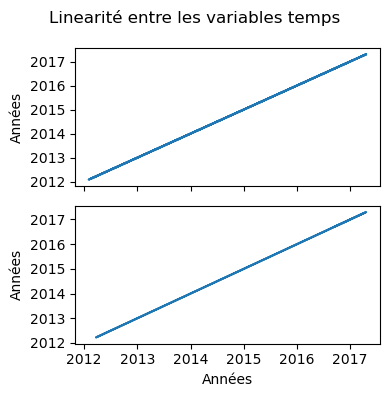

In [12]:
# Verfier que l'on peut enlever la variable dupliqué temps


# Formatage des colonnes temps

    # Changer le format des colonnes "code" et "time'
data['code'] = pd.to_numeric(data['code'], errors = 'coerce')           
for col in data.columns:                                                
    if col.endswith("_datetime"):
        data[col] = pd.to_datetime(data[col], errors='coerce') 
    if col.endswith("_t"):
        data[col] = pd.to_datetime(data[col], unit='s', errors='coerce') 

    # Visualisation de la correlation des dates
fig, axs = plt.subplots(2,1,figsize=(4,4), sharex=True)
axs[0].plot(data.created_datetime.values,data.created_t.values)
axs[0].set_ylabel("Années")
axs[1].plot(data.last_modified_datetime.values,data.last_modified_t.values)
plt.xlabel("Années")
plt.ylabel("Années")
plt.suptitle("Linearité entre les variables temps")
plt.tight_layout()
plt.show()

# out: donnees en double

In [13]:
# Enleve les colonnes de temps si elles sont très corrélées (pearson coeff > 0.9)
if ((np.cov(data.created_t.values.astype(np.int64),data.created_datetime.values.astype(np.int64),ddof=0)[1,0]) > 10**10) \
& ((st.pearsonr(data.created_t.values.astype(np.int64),data.created_datetime.values.astype(np.int64))[0]) > 0.9):      
    data = data.drop(['created_t'], axis=1).reset_index(drop=True) 
if ((np.cov(data.last_modified_t.values.astype(np.int64),data.last_modified_datetime.values.astype(np.int64),ddof=0)[1,0]) > 10**10) \
& ((st.pearsonr(data.last_modified_t.values.astype(np.int64),data.last_modified_datetime.values.astype(np.int64))[0]) > 0.9):    
    data = data.drop(['last_modified_t'], axis=1).reset_index(drop=True)
data_check(data)

# out: memory usage: 41.6+ MB, completed at 69.4 %

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

 ################################################## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320376 entries, 0 to 320375
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   index                    320376 non-null  int64              
 1   code                     320376 non-null  int64              
 2   created_datetime         320375 non-null  datetime64[ns, UTC]

In [14]:
# Nettoyage doublons de code

print(f"{round(data.duplicated('code').sum()/len(data)*100,2)}% of dataset has a duplicated code")
data = data.drop_duplicates('code').reset_index()

0.03% of dataset has a duplicated code


In [15]:
# Corrige l'erreur de formatage des categories pnns_groups_1

display(data.pnns_groups_1.value_counts())
data.pnns_groups_1.fillna('unknown', inplace=True)      # replace NaN values
def format_cat(str_):
    return str(str_).replace('-',' ').capitalize()
data.pnns_groups_1 = data.pnns_groups_1.apply(format_cat)
display(data.pnns_groups_1.value_counts())

pnns_groups_1
unknown                    22581
Sugary snacks              12347
Beverages                   9024
Milk and dairy products     8819
Cereals and potatoes        8427
Fish Meat Eggs              8032
Composite foods             6739
Fruits and vegetables       5904
Fat and sauces              5210
Salty snacks                2808
fruits-and-vegetables        987
sugary-snacks                495
cereals-and-potatoes          16
salty-snacks                   1
Name: count, dtype: int64

pnns_groups_1
Unknown                    251457
Sugary snacks               12842
Beverages                    9024
Milk and dairy products      8819
Cereals and potatoes         8443
Fish meat eggs               8032
Fruits and vegetables        6891
Composite foods              6739
Fat and sauces               5210
Salty snacks                 2809
Name: count, dtype: int64

In [16]:
# Corrige les erreurs de NutriGrade

nutri_grades = ['a', 'b', 'c', 'd', 'e']
mask = (~data['nutrition_grade_fr'].isin(nutri_grades))
data.loc[mask, 'nutrition_grade_fr'] = np.NaN
data.nutrition_grade_fr.value_counts()

nutrition_grade_fr
d    62687
c    45498
e    42971
a    35597
b    34207
Name: count, dtype: int64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

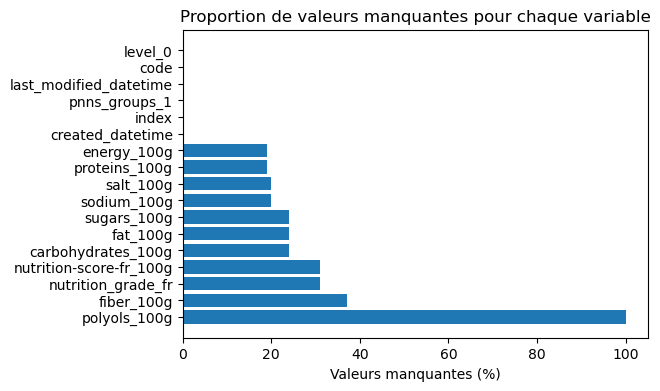

In [17]:
# representation des valeurs manquantes du dataset apres nettoyage initial du dataset

to_plot = round(100*data.isnull().sum(axis=0).sort_values(ascending=False)/data.shape[0])

plt.figure(figsize=(6,4))
plt.barh(y=to_plot.index, width=to_plot.values)#,align='edge')
plt.xlabel("Valeurs manquantes (%)")
plt.title("Proportion de valeurs manquantes pour chaque variable")
plt.plot

## Visualisations variables univariées

Text(0.5, 1.0, 'Distribution des individus par année de création')

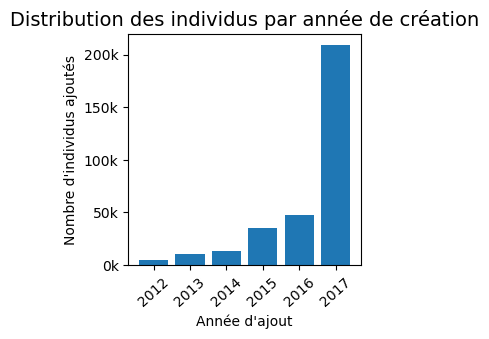

In [18]:
# Diagramme en barres - plt.bar

handle = data.created_datetime.apply(lambda x: x.year).value_counts()
x = handle.index.values
y = handle.values
plt.figure(figsize=(3,3))
plt.bar(x,y)
plt.xticks(ticks=handle.index.values, rotation=42)
plt.xlabel("Année d'ajout")
plt.yticks(ticks=range(0,int(handle.max()),50000),
           labels = [f"{int(i/1000)}k" for i in range(0,int(handle.max()),50000)])
plt.ylabel("Nombre d'individus ajoutés")
plt.title("Distribution des individus par année de création", size=14)

# out: beaucoup plus d'entrées des 2017 mise en place code sur produits

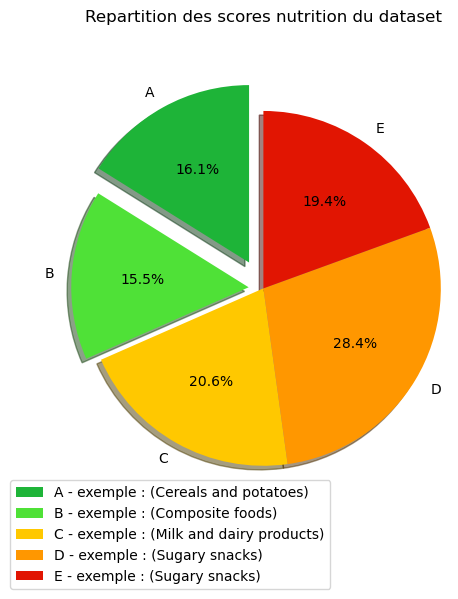

In [19]:
# Diagramme à secteurs - plt.pie

    # prepare labels
dict_main_cat={}
for grade in data.nutrition_grade_fr.value_counts().index:
    handle = data.loc[data.nutrition_grade_fr == grade, 'pnns_groups_1'].value_counts().index.values
    if handle[0] == 'Unknown':
        dict_main_cat[grade] = handle[1]
    else:
        dict_main_cat[grade] = handle[0]
grade_colors = ['#1eb438', '#4fe137', '#ffc800', '#ff9700', '#e11502']
label = [a.upper() for a in data.groupby('nutrition_grade_fr').count().index]


    # plot the graph
plt.pie(data.groupby('nutrition_grade_fr').count().code,
        labels = label, 
        startangle=90, 
        colors = grade_colors,
        shadow = True, 
        explode = (0.2, 0.1, 0, 0,0),
        radius = 1.2, 
        autopct = '%1.1f%%')
plt.legend(labels = [f"{a} - exemple : ({dict_main_cat[a.lower()]})" for a in label] ,bbox_to_anchor=(0.7, 0),)
plt.title("Repartition des scores nutrition du dataset", y=1.2)
plt.show()

# out: 2/3 produits labelisés sont catégories A ou B 

# application app : suggérer 4 produits categorie A ou B

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


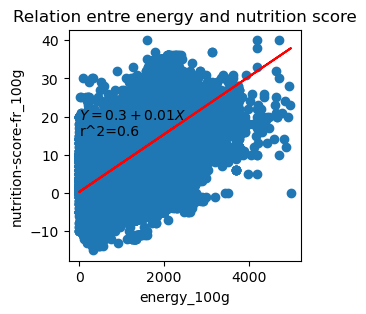

lequation regression linéaire : y = 0.01 x + 0.3 ;
 r_value=0.634808, p_value=0.0, std_err=2e-05


In [20]:
# Nuage de points - plt.scatter

    # preparation data et affiche figure
to_plot = data[['energy_100g','nutrition-score-fr_100g']]
to_plot = to_plot.dropna()
to_plot = to_plot.loc[(to_plot.energy_100g < 5000)&(to_plot['nutrition-score-fr_100g'] < 400)]
x = to_plot.energy_100g
y = to_plot['nutrition-score-fr_100g']
plt.figure(figsize=(3,3))
plt.scatter(x, y)
plt.xlabel('energy_100g')
plt.ylabel('nutrition-score-fr_100g')
plt.title('Relation entre energy and nutrition score')

    # droite de regression lineaire avec spicy stats
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
fitLine = (slope * x + intercept)
plt.text(0,15, f'$Y = {round(intercept,2)} + {round(slope,2)}X$\nr^2={round(r_value,1)}', fontsize=10)
plt.plot(x, fitLine, c='r')
plt.show()
print(f"lequation regression linéaire : y = {round(slope,2)} x + {round(intercept,2)} ;\n r_value={round(r_value,6)}, p_value={round(p_value,6)}, std_err={round(std_err,6)}")

# out: la correlation energy / nutriscore n'est pas linéaire (une regression multivariée est plus appropriée, comme la façon dont le nutriscore est calculée)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


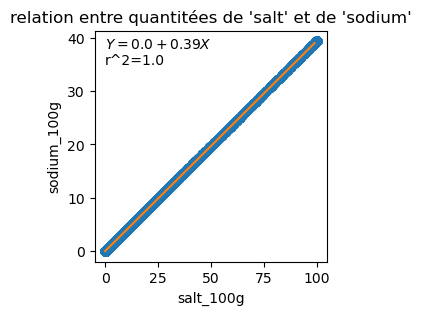

linear approx gives origin :0.0 and slope :0.39, this indicates that there is 2.54 more salt than there is sodium (M(Na) = 29, M(Cl) = 35.5 ; M(NaCl)/M(Na) = 2.22
pearson : 0.9999999917591339 indicates a strong correlation between the variables
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
covariance : 15.01766890399338 indicates a strong relationship between the variables


In [21]:
# Analyse relation des colonnes salt at sodium

    # preparation data
to_plot = data.copy().fillna(0).loc[data.salt_100g < 100][['sodium_100g','salt_100g']]
to_plot['intercept'] = 1
    # droite de regression lineaire avec statsmodels.api
result = sm.OLS(to_plot['sodium_100g'], to_plot.iloc[:,1:]).fit()
a,b = result.params['salt_100g'],result.params['intercept']
    # affiche figure et results
plt.figure(figsize=(3,3))
plt.plot(to_plot.salt_100g,to_plot.sodium_100g, "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.xlabel("salt_100g")
plt.ylabel("sodium_100g")
plt.title("relation entre quantitées de 'salt' et de 'sodium'")
plt.text(0,35, f'$Y = {round(b,2)} + {round(a,2)}X$\nr^2={round(result.rsquared,1)}', fontsize=10)
plt.show()
    # analyse statistique commentaire
print(f"linear approx gives origin :{round(b,2)} and slope :{round(a,2)}, this indicates that there is {round(1/a,2)} more salt than there is sodium (M(Na) = 29, M(Cl) = 35.5 ; M(NaCl)/M(Na) = 2.22")
print("pearson :",st.pearsonr(to_plot.sodium_100g,to_plot.salt_100g)[0],"indicates a strong correlation between the variables")
print("covariance :",np.cov(to_plot.sodium_100g,to_plot.salt_100g,ddof=0)[1,0],"indicates a strong relationship between the variables")
    # imputation des valeurs manquantes
if st.pearsonr(data.sodium_100g.fillna(0),(data.salt_100g * a).fillna(0))[0] > 0.99:
    data['sodium_100g'] = data.salt_100g * a

# out: valeurs manquantes de sodium_100g imputées avec valeurs de salt_100g
# peu etre pas bonne idée car les produits peuvent avoir salt_100g sans spécifier sodium ou magnesium ou autre..)

In [22]:
# Vue d'ensemble des valeurs stats des colonnes numériques
def val_nul(data):
    l_ = len(data)
    m_ = data.median()
    m2_ = data.mean()
    s_ = data.std()
    va_ = data.var()
    m3_ = data.mode()
    s2_ = data.skew()
    k_ = data.kurtosis()
    return  l_, m_, m2_, s_,  s_/m_, va_, m2_, s2_, k_

names_ = ["individus", "Median", "Mean", "standart deviation",
           "Coeff-Variation", "Variance","mode", "Asymétrie", "Kurtosis"]
stats_ = pd.DataFrame()
print(stats_)
for col in ['energy_100g','fat_100g','carbohydrates_100g','proteins_100g', 'fiber_100g','salt_100g','polyols_100g']:
    stats_[data[col].name] = val_nul(data[col])
stats_ = stats_.transpose()
stats_.columns = names_
stats_


Empty DataFrame
Columns: []
Index: []


,individus,Median,Mean,standart deviation,Coeff-Variation,Variance,mode,Asymétrie,Kurtosis
energy_100g,320266.0,1100.00000,1141.895330,6451.141059,5.864674,4.161722e+07,1141.895330,490.708727,247086.611966
fat_100g,320266.0,5.00000,12.730510,17.579773,3.515955,3.090484e+02,12.730510,2.465339,17.197908
carbohydrates_100g,320266.0,20.59000,32.069298,29.732769,1.444039,8.840375e+02,32.069298,4.284822,363.000033
proteins_100g,320266.0,4.76000,7.075705,8.408723,1.766539,7.070663e+01,7.075705,-1.817318,409.632679
fiber_100g,320266.0,1.50000,2.861423,12.874105,8.582736,1.657426e+02,2.861423,363.427519,151675.672012
salt_100g,320266.0,0.58166,2.027815,128.350739,220.662825,1.647391e+04,2.027815,493.196056,247003.726758
polyols_100g,320266.0,59.75000,49.790389,33.212338,0.555855,1.103059e+03,49.790389,-0.004720,-1.365672


******************************
individues with null values represent 19 % de la population


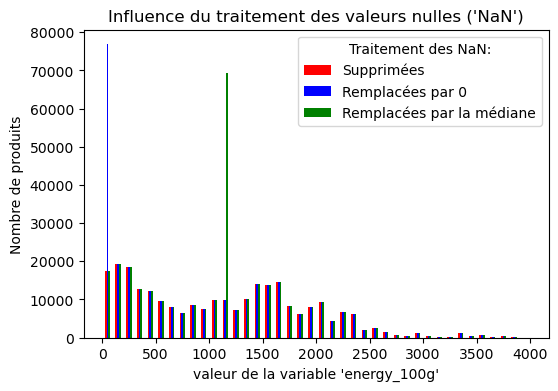

In [23]:
# histogramme - plt.hist

to_plot = data[['energy_100g']]
print(30*"*")
print("individues with null values represent",round(to_plot.energy_100g.isnull().sum()/len(to_plot)*100),"% de la population")

plt.figure(figsize=(6,4))
plt.hist([to_plot.energy_100g.dropna(),
          to_plot.energy_100g.fillna(0),
          to_plot.energy_100g.fillna(to_plot.energy_100g.median())], 
          bins=40, range=(0, 4000), color = ['red','blue','green'],
histtype = 'bar', rwidth = 0.5)
plt.xlabel("valeur de la variable 'energy_100g'")
plt.ylabel('Nombre de produits')
plt.title("Influence du traitement des valeurs nulles ('NaN')")
plt.legend(title='Traitement des NaN:',
           labels = ['Supprimées','Remplacées par 0','Remplacées par la médiane'])
plt.show()

# out: 20% de la variable energy = null(), elle peut etre calculée

## Corrections valeurs abherantes 

In [24]:
to_check = data[['energy_100g','fat_100g','carbohydrates_100g','proteins_100g', 'fiber_100g','salt_100g']]
to_check.describe()
# there are negative values, more celaning is needed

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,fiber_100g,salt_100g
count,2.607860e+05,243558.000000,243259.000000,259583.000000,200647.000000,255184.000000
mean,1.141895e+03,12.730510,32.069298,7.075705,2.861423,2.027815
std,6.451141e+03,17.579773,29.732769,8.408723,12.874105,128.350739
min,0.000000e+00,0.000000,0.000000,-800.000000,-6.700000,0.000000
25%,3.770000e+02,0.000000,6.000000,0.700000,0.000000,0.063500
50%,1.100000e+03,5.000000,20.590000,4.760000,1.500000,0.581660
75%,1.674000e+03,20.000000,58.330000,10.000000,3.600000,1.374140
max,3.251373e+06,714.290000,2916.670000,430.000000,5380.000000,64312.800000


In [25]:
# remplace valeurs abherantes par leur valeur absolue diminué d'1 ordre de grandeur jusqu'a < 100g
"""for col in ['proteins_100g','fiber_100g']:
    data.loc[data[col] < 0] = 0"""

def correct_abherant_values(val):
    val = abs(val)
    while val > 100:
        val = val/10
    return val

for col in to_check.columns:
    data.loc[data[col]>100, col].apply(correct_abherant_values)

# out: plus de valeurs .null() ou valeurs abherentes pour les quantitées

In [26]:
# enleve les produits pour lesquels la somme des ingredients > 100g

data_to_keep = data.copy()
data_to_keep = data_to_keep[['fat_100g','carbohydrates_100g','proteins_100g', 'fiber_100g','sodium_100g','polyols_100g']] # 'salt_100g']]
handle = (data_to_keep.transpose().sum()<=100).value_counts()
print("individus avec somme ingredients > 100 g/ \n",handle)
print(f"{round(handle[0]/handle[1]*100)}% du dataset à enlever")                  # Check index - 21958 lines of product to remove
idxs = (data_to_keep).transpose().columns[data_to_keep.transpose().sum()<=100]  # save index 
data = data.iloc[idxs].reset_index(drop=True)                                   # drop index

# out: enlève 7% des individus du dataset

individus avec somme ingredients > 100 g/ 
 True     299376
False     20890
Name: count, dtype: int64
1433% du dataset à enlever


/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_34246/2882164530.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{round(handle[0]/handle[1]*100)}% du dataset à enlever")                  # Check index - 21958 lines of product to remove


In [27]:
# Fonctions pour analyses univariées

def TendanceCent(subset):
    return(f"\n *TendanceCent* \nMedian : {round(subset.median(),2)}\nMean : {round(subset.mean(),2)}\nMode : {round(subset.mode(),2)}")
def Dispersion(subset):
    return(f"\n **Dispersion** \nVariance : {round(subset.var(),2)}\nEcart-type : {round(subset.std(),2)}\nCoeff-Variation : {round(subset.std()/subset.mean(),2)}")
def Forme(subset):  #
    return(f"\n **Forme **\nAsymétrie : {round(subset.skew(),2)}\nKurtosis : {round(subset.kurtosis(),2)}")
    #print(" si skewness >0 : Moy>Med>Mode (étalée à droite) ; et si skewness <0 ; Moy<Med<Mode (étalée à gauche)")
    #print(" kurtosis >0 : distribution plus concentré q distrib normale ; kurtosis <0 : distribution plus applatie q distribution normale")
def compare(col1,col2, title=""):
    plt.figure(figsize=(3, 3))
    plt.plot(col1,col2,'o')
    plt.xlabel(col1.name)
    plt.ylabel(col2.name)
    plt.title(title)
    plt.show()

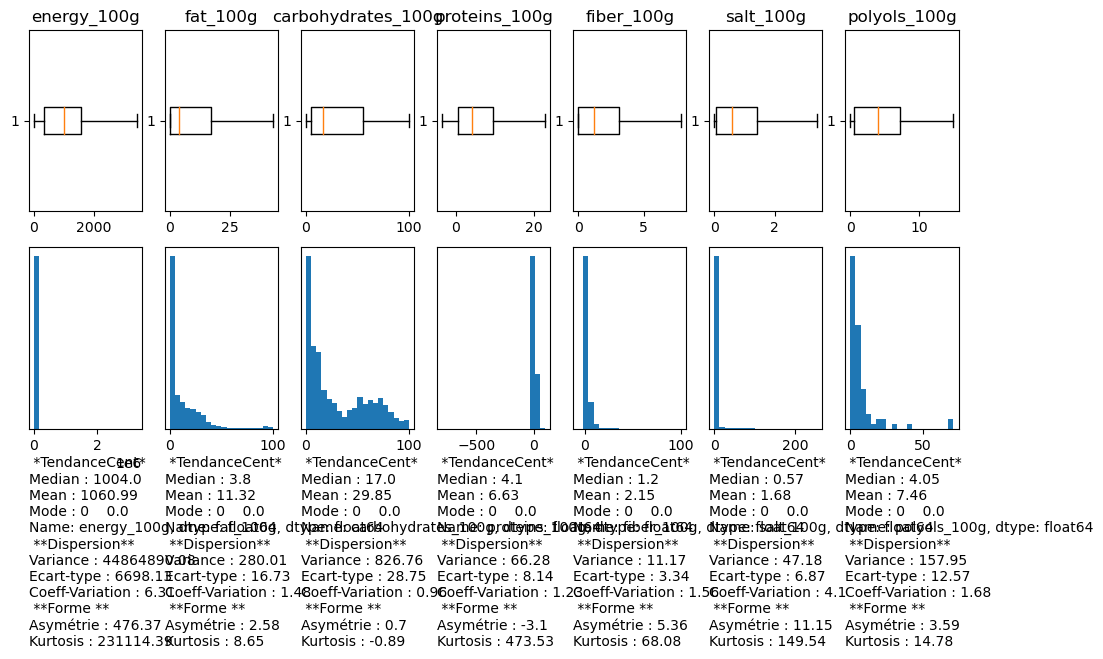

In [29]:
# analyse statistiqe rapide
liste = ['energy_100g','fat_100g','carbohydrates_100g','proteins_100g', 'fiber_100g','salt_100g','polyols_100g',] 

fig, axs = plt.subplots(3,7, figsize=(12,8))#, sharey=True)
for i, item in enumerate(liste):
    # boxplot
    axs[0,i].set_title(f"{item}")
        # ncessaire de filtrer les valeurs nulles
    axs[0,i].boxplot(data.loc[~data[item].isnull(), item], vert=False, showfliers=False)
    axs[0,i].xaxis.set_visible(True)
    # histogrammes
    axs[1,i].hist(data.loc[~data[item].isnull(), item], bins=20)
    axs[1,i].yaxis.set_visible(False)
    # statistiques
    axs[2,i].text(0,0,s=TendanceCent((data[item]))+Dispersion((data[item]))+Forme((data[item]))) 
    axs[2,i].axis('off') 

# out: energy > 3600 impossible (100g (fat) * 3.6 = 3600 kJ Max)

# Distribution plots : matplotlib vs seaborn

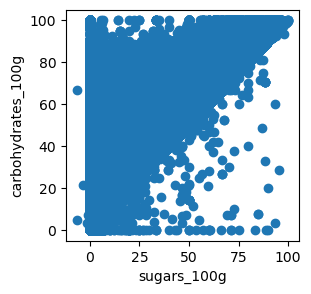

sugars is spart of carbohydrates


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


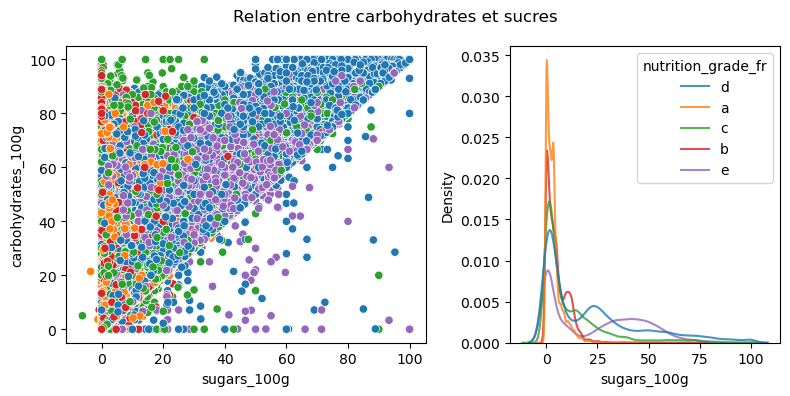

In [30]:
# source de carbohydrates provenant du sucre

# matplotlib
to_plot = data[data.sugars_100g < 100]
compare(to_plot.sugars_100g,to_plot.carbohydrates_100g) 
print("sugars is spart of carbohydrates")

# seaborn
fig, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=data, x="sugars_100g", y="carbohydrates_100g", hue="nutrition_grade_fr", legend=False, ax=axs[0])
sns.kdeplot(data=data, x="sugars_100g", hue="nutrition_grade_fr",  alpha=.8, ax=axs[1])
fig.suptitle("Relation entre carbohydrates et sucres")
fig.tight_layout()

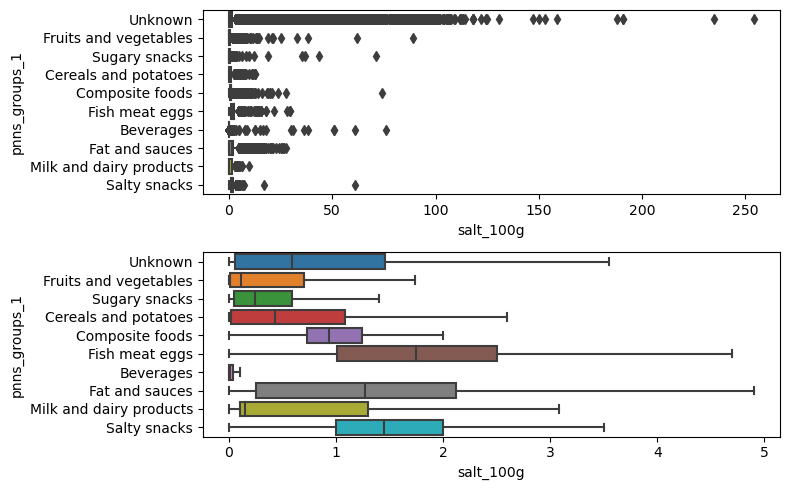

In [31]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(8,5))
sns.boxplot(data=data, x= "salt_100g", y='pnns_groups_1', ax=ax1)
ax2 = sns.boxplot(data=data, x= "salt_100g", y='pnns_groups_1',showfliers=False)
plt.tight_layout()
plt.show()

In [32]:
# Valeurs abhérantes remplacées par np.NaN
data_100g = data.loc[:,data.columns.str.endswith('_100g')]   # subset of column to remove outliers
for col in data_100g.columns:
        if (col.endswith('_100g')) & (('energy') not in col):
            data_100g.loc[data_100g[col] < 0, col] = np.nan
            data_100g.loc[data_100g[col] > 100, col] = np.nan
        if (('energy') in col):
            
            data_100g.loc[data_100g[col] < 0, col] = np.nan
        
            data_100g.loc[data_100g[col] > 3700, col] = np.nan

    # jointure des colonnes formattées sur le dataset préalablement netoyé de ces colonnes
data = data.drop(data_100g.columns.tolist(),axis=1).join(data_100g)

/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_34246/3874117150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100g.loc[data_100g[col] < 0, col] = np.nan
/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_34246/3874117150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100g.loc[data_100g[col] > 100, col] = np.nan
/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_34246/3874117150.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [33]:
# remplace valeur nulle de salt par la mediane du groupe
print("before :",round(100*data.salt_100g.isnull().sum()/len(data)),"null values")
for group in data.pnns_groups_1.unique():
    data.loc[(data.pnns_groups_1 == group)&(data.salt_100g.isnull()),'salt_100g'] = data.groupby('pnns_groups_1')['salt_100g'].median()[group]
print("after :",round(100*data.salt_100g.isnull().sum()/len(data)),"null values")

before : 22 null values
after : 0 null values


# Calcul des energies pour comparer avec les valeurs renseignees dans le dataframe

In [34]:
data_100g = data.loc[:,data.columns.str.endswith('_100g')]  
data_100g = data_100g[['fat_100g','carbohydrates_100g','proteins_100g', 'fiber_100g','salt_100g','polyols_100g']]
to_compare = pd.DataFrame(data.energy_100g)
to_compare.columns = ['energy_100g']

def calculate_NRJ(data_100g):
    return (data_100g['fat_100g'].values * 37 
            + data_100g['carbohydrates_100g'].values * 17 
            + data_100g['proteins_100g'].values * 17 
            + data_100g['polyols_100g'].values * 10 
            + data_100g['fiber_100g'].values * 8)

to_compare['NRJ_100g'] = calculate_NRJ(data_100g)
to_compare['linearity'] = to_compare.energy_100g/to_compare.NRJ_100g
to_compare = to_compare[['NRJ_100g','energy_100g']].dropna()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


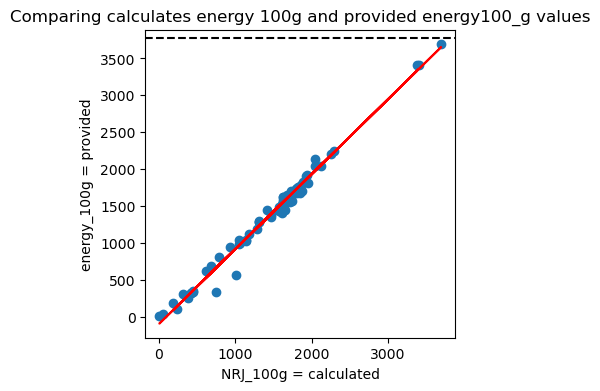

linear regression with y=1.01x -98.49; r_value=0.99, p_value=0.0, std_err=0.01, n-points=66


In [35]:
x = to_compare['NRJ_100g']
y = to_compare['energy_100g']
plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.xlabel('NRJ_100g = calculated')
plt.ylabel('energy_100g = provided')
plt.title('Comparing calculates energy 100g and provided energy100_g values')
#droite de regression lineaire
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
fitLine = (slope * x + intercept)
plt.plot(x, fitLine, c='r')
plt.axhline(y = 3770, color = 'black', linestyle = '--')
plt.show()


print(f"linear regression with y={round(slope,2)}x {round(intercept,2)}; r_value={round(r_value,2)}, p_value={round(p_value,2)}, std_err={round(std_err,2)}, n-points={len(x)}")

In [36]:
# on remplace les valeurs nulle de energy_100g par la valeur calculé NRJ_100g
print("before :",round(100*data.energy_100g.isnull().sum()/len(data)),"null values")
data.loc[(data.energy_100g.isnull()),'energy_100g'] = calculate_NRJ(data.loc[(data.energy_100g.isnull())])
print("after :",round(100*data.energy_100g.isnull().sum()/len(data)),"null values")

before : 20 null values
after : 20 null values


## Export du Dataset nettoyé

In [37]:
# Ecriture dans le dossier source
data.to_csv('CleanedOpenFoodFacts.csv', encoding='utf-8', sep='\t', header=True, index=False)
#data = pd.read_csv('CleanedOpenFoodFacts.csv', encoding='utf-8', sep='\t', header=True, index=False)

In [38]:
data.describe()

,level_0,index,code,nutrition-score-fr_100g,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,fiber_100g,salt_100g,sodium_100g,sugars_100g,polyols_100g
count,299376.000000,299376.000000,2.993760e+05,166973.000000,239334.000000,222718.000000,222393.000000,238730.000000,180333.000000,299376.000000,234412.000000,224135.000000,76.000000
mean,164144.130815,164327.456904,2.299926e+12,11.309565,1037.638612,11.315087,29.849088,6.635828,2.145300,1.398054,0.660056,15.522338,7.460276
std,92759.599552,92867.771736,2.674760e+12,7.848591,757.751361,16.733561,28.753364,7.904411,3.341917,5.687093,2.704290,21.009423,12.567949
min,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83436.750000,83510.750000,6.120202e+10,4.000000,335.000000,0.000000,5.000000,0.500000,0.000000,0.101600,0.023000,1.200000,0.500000
50%,168423.500000,168545.500000,8.311930e+11,12.000000,1000.000000,3.800000,17.000000,4.100000,1.200000,0.591820,0.224999,5.350000,4.050000
75%,244568.250000,244852.250000,3.564700e+12,17.000000,1579.000000,17.300000,55.000000,9.460000,3.150000,1.186180,0.551179,22.580000,7.275000
max,320375.000000,320771.000000,2.004176e+13,40.000000,3700.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.999679,100.000000,71.000000
